In [31]:
# Correction that to be made:
## rectify manual changes
## check how pvalue is getting calculated

In [1]:
import pandas as pd
import numpy as np
import pickle
import inspect
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# importing modules
import helper_functions
import config
import model_trainer
import all_models

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# functions_list = [func for func in dir(helper_functions) if inspect.isfunction(getattr(helper_functions, func))]
# functions_list

# Importing Data and Exploring It

In [2]:
# loan = pd.read_csv(r"C:\Shubham\credit_scorecard\input_data\loan.csv")
loan_data_2007_2014 = pd.read_csv(r"C:\Shubham\credit_scorecard\input_data\loan_data_2007_2014.csv")
# loan_data_2015 = pd.read_csv(r"C:\Shubham\credit_scorecard\input_data\loan_data_2015_new.csv")

loan_data_backup = loan_data_2007_2014.iloc[:,1:]
loan_data = loan_data_backup.copy()

# General Preprocessing

In [3]:
# extracted integers and dates from few columns
loan_data = helper_functions.preprocessing_continous_variables(loan_data)

# created dummy variables for required columns
loan_data = helper_functions.preprocessing_discrete_variables(loan_data)

# dealing with missing values
loan_data = helper_functions.deal_with_missing_values(loan_data)

# PD Model

Adding Target Variable Column and Splitting Data

In [4]:
# creating target variable
loan_data = helper_functions.target_var(loan_data)

# splitting data
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = helper_functions.splitting_data(loan_data)

# ## saving the splitted data
# loan_data_inputs_train.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_train.csv',index=False)
# loan_data_targets_train.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_targets_train.csv',index=False)
# loan_data_inputs_test.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_test.csv',index=False)
# loan_data_targets_test.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_targets_test.csv',index=False)

Binning train data

In [5]:
df_inputs_prepr_1 = loan_data_inputs_train.copy()
df_targets_prepr_1 = loan_data_targets_train.copy()

## binning discrete variables
df_inputs_prepr_1,df_with_woe_n_iv_values_discrete = helper_functions.binning_discrete_variables(df_inputs_prepr_1,df_targets_prepr_1)

## binning continous variables
df_inputs_prepr_1,df_with_woe_n_iv_values_continous = helper_functions.binning_continous_variables(df_inputs_prepr_1,df_targets_prepr_1)

## final df for woe and iv values
df_with_woe_n_iv_values = pd.concat([df_with_woe_n_iv_values_discrete,df_with_woe_n_iv_values_continous],axis=0)
df_with_woe_n_iv_values.to_csv(r"C:\Shubham\credit_scorecard\output_data\df_with_woe_n_iv_values_train.csv",index=False)

Binning test data

In [6]:
df_inputs_prepr_2 = loan_data_inputs_test.copy()
df_targets_prepr_2 = loan_data_targets_test.copy()

## binning discrete variables
df_inputs_prepr_2,df_with_woe_n_iv_values_discrete = helper_functions.binning_discrete_variables(df_inputs_prepr_2,df_targets_prepr_2)

## binning continous variables
df_inputs_prepr_2,df_with_woe_n_iv_values_continous = helper_functions.binning_continous_variables(df_inputs_prepr_2,df_targets_prepr_2)

## final df for woe and iv values
df_with_woe_n_iv_values = pd.concat([df_with_woe_n_iv_values_discrete,df_with_woe_n_iv_values_continous],axis=0)
df_with_woe_n_iv_values.to_csv(r"C:\Shubham\credit_scorecard\output_data\df_with_woe_n_iv_values_test.csv",index=False)

# Applying All Models

In [7]:
# inputs_train = helper_functions.get_input_train_data(loan_data_inputs_train)
# inputs_test = helper_functions.get_input_train_data(loan_data_inputs_test)
# model_report,r2_square = model_trainer.initiate_model_trainer(inputs_train,df_targets_prepr_1,inputs_test,df_targets_prepr_2)

# Feature Selection

Using p-value

In [8]:
loan_data_inputs_train = df_inputs_prepr_1.copy()
loan_data_inputs_test = df_inputs_prepr_2.copy()

# list of variables that need to be removed from dataset.
variables_to_be_removed = ['delinq_2yrs','open_acc','pub_rec','total_acc','total_rev_hi_lim']
pvalue_features,pvalue_variables = helper_functions.feature_selection_using_pvalue(variables_to_be_removed)

In [10]:
pvalue_variables

['grade',
 'home_ownership',
 'addr_state',
 'verification_status',
 'purpose',
 'initial_list_status',
 'term',
 'emp_length',
 'mths_since_issue_d',
 'int_rate',
 'mths_since_earliest_cr_line',
 'inq_last_6mths',
 'acc_now_delinq',
 'annual_inc',
 'dti',
 'mths_since_last_delinq',
 'mths_since_last_record']

using IV

In [11]:
# inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , pvalue_features]
# inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , pvalue_features]

In [12]:
# # creating a dataframe which will contain for every customer original category name at every column.
# final_df = helper_functions.original_var_col(inputs_train_with_ref_cat,pvalue_variables)

# # calculating woe and IV, and applying IV filter
# df_woe,df_iv,iv_variables,iv_features = helper_functions.feature_selection_using_iv(final_df,loan_data_targets_train,pvalue_variables)

Selecting Features

In [13]:
# inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , iv_features]
# inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , iv_features]

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , pvalue_features]
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , pvalue_features]

In [14]:
# # reference categories after IV filter
# ref_categories = ['grade:G','annual_inc:<20K','int_rate:>20.281','mths_since_issue_d:>84']

# inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [15]:
# reference categories after p-value filter
ref_categories = [  'grade:G',
                    'home_ownership:RENT_OTHER_NONE_ANY',
                    'addr_state:ND_NE_IA_NV_FL_HI_AL',
                    'verification_status:Verified',
                    'purpose:educ__sm_b__wedd__ren_en__mov__house',
                    'initial_list_status:f',
                    'term:60',
                    'emp_length:0',
                    'mths_since_issue_d:>84',
                    'int_rate:>20.281',
                    'mths_since_earliest_cr_line:<140',
                    'inq_last_6mths:>6',
                    'acc_now_delinq:0',
                    'annual_inc:<20K',
                    'dti:>35',
                    'mths_since_last_delinq:0-3',
                    'mths_since_last_record:0-2']

inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [16]:
print(inputs_train.shape)
print(loan_data_targets_train.shape)
print(inputs_test.shape)

(373028, 84)
(373028,)
(93257, 84)


# PD Model Estimation

Loading Data

In [17]:
# loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
# loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)
# loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
# loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

In [18]:
# inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , iv_features]
# inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

Logistic Regression

In [20]:
# reg,summary_tablefor_lr = helper_functions.logistic_regression(inputs_train,loan_data_targets_train)
# summary_tablefor_lr.to_csv(r"C:\Shubham\credit_scorecard\output_data\summary_tablefor_lr.csv",index=False)

In [21]:
# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_pd_model.sav', 'wb'))
# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_pd_model.pkl', 'wb'))

Logistic Regression with p-values

In [18]:
# reg,summary_tablefor_lr_with_p_values = helper_functions.logistic_regression_with_p_values(inputs_train,loan_data_targets_train)
# summary_tablefor_lr_with_p_values.to_csv(r"C:\Shubham\credit_scorecard\output_data\summary_tablefor_lr_with_p_values.csv",index=False)

In [19]:
# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_with_pvalue_pd_model.sav', 'wb'))
# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_with_pvalue_pd_model.pkl', 'wb'))

Logistic Regression with pvalue filtered features

In [37]:
reg,summary_tablefor_lr_with_p_values = helper_functions.logistic_regression(inputs_train,loan_data_targets_train)
summary_tablefor_lr_with_p_values.to_csv(r"C:\Shubham\credit_scorecard\output_data\summary_table_for_lr_with_pvalue_features.csv",index=False)

In [38]:
pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_pd_model_with_pvalue_features.sav', 'wb'))
pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\lr_pd_model_with_pvalue_features.pkl', 'wb'))

Decision Tree

In [22]:
# dt_best_model, dt_best_params = all_models.decision_tree(inputs_train,loan_data_targets_train)

# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\dt_pd_model.sav', 'wb'))
# pickle.dump(reg, open(r'C:\Shubham\credit_scorecard\src\dt_pd_model.pkl', 'wb'))

# df_actual_predicted_probs = all_models.out_of_sample_validation(inputs_test,loan_data_targets_test,dt_best_model)

# df_actual_predicted_probs, confusion_matrix, accuracy, fpr, tpr, thresholds, AUROC, Gini, KS = all_models.evaluate_model(df_actual_predicted_probs)
# print('confusion_matrix',confusion_matrix)
# print('accuracy:',accuracy)
# print('fpr:',fpr)
# print('tpr:',tpr)
# print('thresholds:',thresholds)
# print('AUROC:',AUROC)
# print('Gini',Gini)
# print('KS',KS)

Random Forest

In [24]:
# rf_best_model, rf_best_params = all_models.random_forest(inputs_train,loan_data_targets_train)
# df_actual_predicted_probs = all_models.out_of_sample_validation(inputs_test,loan_data_targets_test,rf_best_model)
# df_actual_predicted_probs, confusion_matrix, accuracy, fpr, tpr, thresholds, AUROC, Gini, KS = all_models.evaluate_model(df_actual_predicted_probs)
# print('confusion_matrix',confusion_matrix)
# print('accuracy:',accuracy)
# print('fpr:',fpr)
# print('tpr:',tpr)
# print('thresholds:',thresholds)
# print('AUROC:',AUROC)
# print('Gini',Gini)
# print('KS',KS)

Gaussian Naive Bayes

In [25]:
# nb_classifier = all_models.gauss_NB(inputs_train,loan_data_targets_train)
# df_actual_predicted_probs = all_models.out_of_sample_validation(inputs_test,loan_data_targets_test,nb_classifier)
# df_actual_predicted_probs, confusion_matrix, accuracy, fpr, tpr, thresholds, AUROC, Gini, KS = all_models.evaluate_model(df_actual_predicted_probs)
# print('confusion_matrix',confusion_matrix)
# print('accuracy:',accuracy)
# print('fpr:',fpr)
# print('tpr:',tpr)
# print('thresholds:',thresholds)
# print('AUROC:',AUROC)
# print('Gini',Gini)
# print('KS',KS)

# PD Model Validation

In [26]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
# So, make appropriate changes in the code.
# inputs_test = helper_functions.get_input_test_data(loan_data_inputs_test)
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , iv_features]
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
df_actual_predicted_probs = helper_functions.out_of_sample_validation(inputs_test,loan_data_targets_test,reg)

In [143]:
inputs_test.head(1)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K
362514,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [152]:
with open(r'C:\Shubham\credit_scorecard\src\pd_model.pkl',"rb") as file_obj:
    model = pickle.load(file_obj)
pred_dict = {
    "default_prediction" : model.model.predict(inputs_test.head(1)),
    "default_prob" : model.model.predict_proba(inputs_test.head(1))
}

In [153]:
pred_dict

{'default_prediction': array([1]),
 'default_prob': array([[0.07765661, 0.92234339]])}

In [149]:
inputs_test.head(1)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K
362514,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [145]:
pd.DataFrame({key: 0 for key in iv_features},index=[0])

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


accuracy and area under the curve

Predicted   0      1
Actual              
0          27  10163
1          20  83047
accuracy: 0.8908071243981684
fpr: [0.00000000e+00 9.81354269e-05 1.96270854e-04 ... 9.99705594e-01
 9.99803729e-01 1.00000000e+00]
tpr: [0.00000000e+00 6.62116123e-04 2.46788737e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
thresholds: [1.98652064 0.98652064 0.98599924 ... 0.5566961  0.54358834 0.51322152]
AUROC: 0.6929638114582015


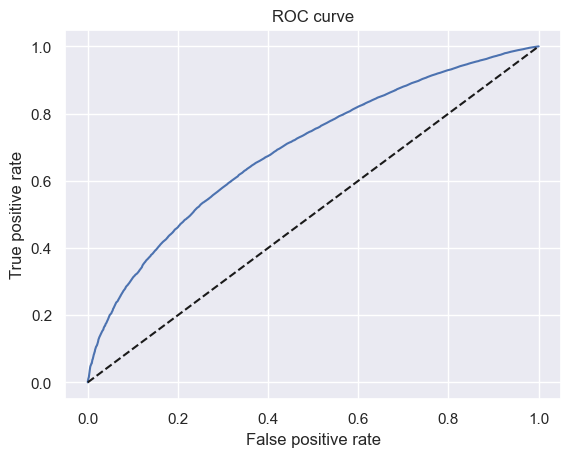

In [27]:
df_actual_predicted_probs, confusion_matrix, accuracy, fpr, tpr, thresholds, AUROC = helper_functions.accuracy_n_auc(df_actual_predicted_probs)
print('accuracy:',accuracy)
print('fpr:',fpr)
print('tpr:',tpr)
print('thresholds:',thresholds)
print('AUROC:',AUROC)

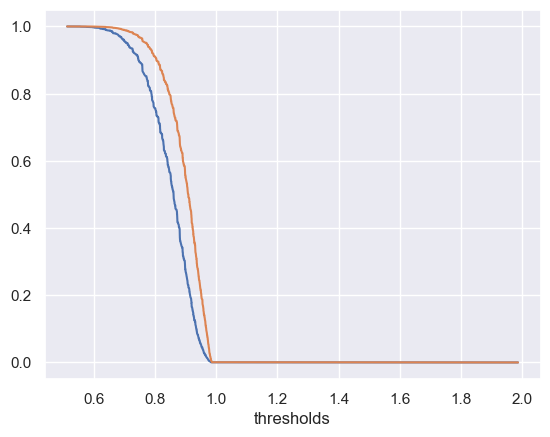

In [28]:
# threshold vs fpr and tpr curves
data = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
df = pd.DataFrame(data)
# Plotting the curve
plt.plot(df['thresholds'], df['fpr'], label='fpr vs thresholds')
plt.plot(df['thresholds'], df['tpr'], label='tpr vs thresholds')
plt.xlabel('thresholds')
plt.show()

calculating GINI and Kolmogorov-Smirnov

Gini: 0.38592762291640303
KS: 0.2823748125899482


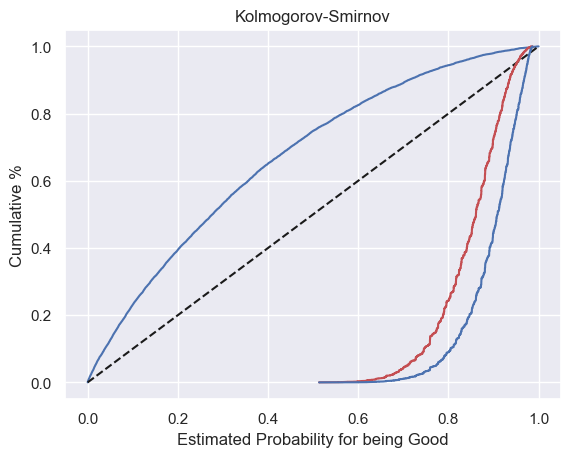

In [29]:
df_actual_predicted_probs, Gini, KS = helper_functions.gini_n_ks(df_actual_predicted_probs,AUROC)
print('Gini:',Gini)
print('KS:',KS)

# Creating Scorecard

In [23]:
# creating scorecard after feature selection using IV
df_scorecard,min_sum_score_prel,max_sum_score_prel,min_sum_coef,max_sum_coef = helper_functions.socrecard(ref_categories,summary_tablefor_lr_with_p_values)

NameError: name 'summary_tablefor_lr_with_p_values' is not defined

# Applying the PD Model

In [31]:
# calculating credit score
y_scores = helper_functions.calc_credit_score(inputs_test_with_ref_cat,df_scorecard)

# From Credit Score to PD
y_hat_proba_from_score = helper_functions.credit_score_to_pd(y_scores,min_sum_coef,max_sum_coef)

# setting cut-off
df_cutoffs = helper_functions.set_cut_off(df_actual_predicted_probs,fpr,tpr,thresholds,min_sum_coef,max_sum_coef,min_score=300,max_score=850)

# Preprocessing the Test Dataset

In [32]:
loan_data_inputs_train = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_train.csv')
loan_data_targets_train = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_targets_train.csv')
loan_data_inputs_test = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_test.csv')
loan_data_targets_test = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_targets_test.csv')
loan_data_backup = pd.read_csv(r"C:\Shubham\credit_scorecard\input_data\loan_data_2015_new.csv")
# loan_data_backup contains original columns only
loan_data = loan_data_backup.copy()

In [33]:
loan_data = helper_functions.preprocessing_continous_variables(loan_data)
loan_data = helper_functions.preprocessing_discrete_variables(loan_data)
loan_data = helper_functions.deal_with_missing_values(loan_data)
loan_data = helper_functions.target_var(loan_data)

In [34]:
df_inputs_prepr = loan_data.drop('good_bad',axis=1)
df_targets_prepr = loan_data['good_bad']

# binning discrete variables
df_inputs_prepr,df_new_data_with_woe_n_iv_values_discrete = helper_functions.binning_discrete_variables(df_inputs_prepr,df_targets_prepr)

# binning continous variables
df_inputs_prepr,df_new_data_with_woe_n_iv_values_continous = helper_functions.binning_continous_variables(df_inputs_prepr,df_targets_prepr)

# df_inputs_prepr contains all the features including reference ones

# final df for woe and iv values
df_with_woe_n_iv_values = pd.concat([df_new_data_with_woe_n_iv_values_discrete,df_new_data_with_woe_n_iv_values_continous],axis=0)
df_with_woe_n_iv_values.to_csv(r"C:\Shubham\credit_scorecard\output_data\df_new_data_with_woe_n_iv_values_train.csv",index=False)

In [35]:
loan_data_inputs_2015 = df_inputs_prepr
loan_data_targets_2015 = df_targets_prepr

loan_data_inputs_2015.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_2015.csv',index=False)
loan_data_targets_2015.to_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_targets_2015.csv',index=False)

In [36]:
# inputs_train_with_ref_cat = loan_data_inputs_2015.loc[: , iv_features]

# # reference categories after IV filter
# ref_categories = ['grade:G','annual_inc:<20K','int_rate:>20.281','mths_since_issue_d:>84']

# inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

# inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , iv_features]
# inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [37]:
# calculating scores wrt PD
inputs_train_with_ref_cat_w_intercept, inputs_2015_with_ref_cat_w_intercept = helper_functions.test_data_preprocessing(loan_data_inputs_2015)

# Population Stability Index

In [38]:
PSI_calc = helper_functions.pop_stability_index(inputs_train_with_ref_cat_w_intercept,inputs_2015_with_ref_cat_w_intercept)

In [39]:
PSI_calc.to_csv(r"C:\Shubham\credit_scorecard\output_data\psi.csv",index=False)

# LGD and EAD Models

In [40]:
# importing data
loan_data_backup = pd.read_csv(r"C:\Shubham\credit_scorecard\input_data\loan_data_2007_2014.csv")
loan_data = loan_data_backup.copy()

In [41]:
loan_data = helper_functions.preprocessing_continous_variables(loan_data.copy())
loan_data = helper_functions.preprocessing_discrete_variables(loan_data.copy())
loan_data = helper_functions.deal_with_missing_values(loan_data.copy())
loan_data = helper_functions.target_var(loan_data.copy())
# in loan_data, dummy variable columns are present, but binning has not been done for LGD and EAD Models.

In [42]:
loan_data_defaults = loan_data[loan_data['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

loan_data_defaults = helper_functions.dependent_var_creation(loan_data_defaults)

Exploring Dependent Variables

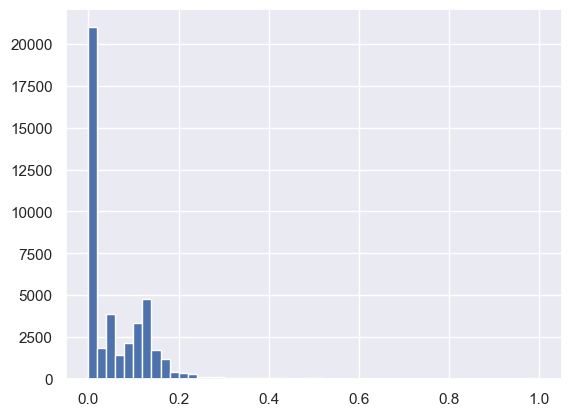

In [43]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
plt.show()

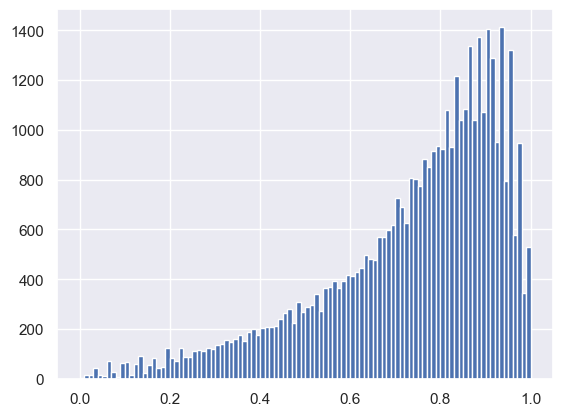

In [44]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

In [133]:
lgd_inputs_stage_1_train = helper_functions.filter_lgd_train_data(lgd_inputs_stage_1_train)

In [154]:
lgd_inputs_stage_1_train.head(1)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,verification_status:Not Verified,verification_status:Source Verified,purpose:car,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:w,term_int,emp_length_int,mths_since_issue_d,mths_since_earliest_cr_line,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
165859,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,36,8.0,58,174.0,13550,18.49,493.21,38000.0,26.31,0.0,2.0,0.0,0.0,17.0,0.0,34.0,0.0,13700.0


In [48]:
# null_counts = lgd_inputs_stage_1_train.isnull().sum()
# for column, count in null_counts[null_counts > 0].items():
#     print(f"{column}: {count}")

# Stage-1: Logistic Regression

Estimating the Model

In [49]:
reg_lgd_st_1, summary_table_st_1 = helper_functions.logistic_regression_with_p_values(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

Filtering Features from Test Data

In [50]:
lgd_inputs_stage_1_test = helper_functions.filter_lgd_train_data(lgd_inputs_stage_1_test)

Evaluating the Model

In [51]:
df_actual_predicted_probs = helper_functions.out_of_sample_validation(lgd_inputs_stage_1_test,lgd_targets_stage_1_test,reg_lgd_st_1)

In [52]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
178928,1,0.609241
69814,1,0.610980
101396,0,0.454865
463268,1,0.547295
253729,0,0.414709


Estimating Accuracy of the Model

Predicted     0     1
Actual               
0          2723  1039
1          2451  2435


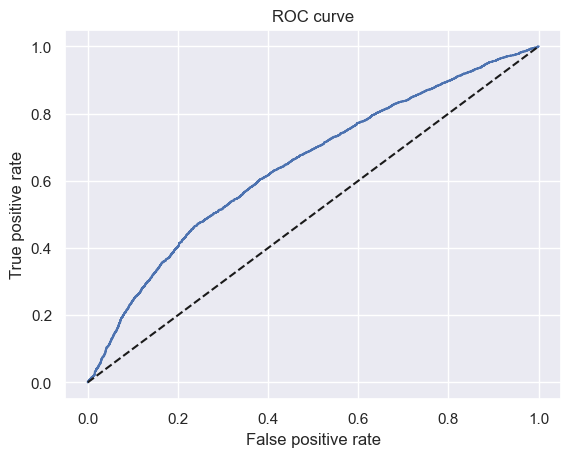

In [53]:
df_actual_predicted_probs, confusion_matrix, accuracy, fpr, tpr, thresholds, AUROC = helper_functions.accuracy_n_auc(df_actual_predicted_probs)

In [135]:
print('accuracy:',accuracy)
print('fpr:',fpr)
print('tpr:',tpr)
print('thresholds:',thresholds)
print('AUROC:',AUROC)

accuracy: 0.5964384828862165
fpr: [0.         0.         0.         ... 0.99946837 0.99946837 1.        ]
tpr: [0.00000000e+00 2.04666394e-04 1.02333197e-03 ... 9.99795334e-01
 1.00000000e+00 1.00000000e+00]
thresholds: [1.89356133e+00 8.93561326e-01 8.59845928e-01 ... 1.97266711e-01
 1.81769131e-01 2.55891577e-06]
AUROC: 0.6452731529265988


In [55]:
df_actual_predicted_probs.columns

Index(['loan_data_targets_test', 'y_hat_test_proba', 'y_hat_test'], dtype='object')

In [57]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1','y_hat_test_lgd_stage_1']

Saving the Model

In [56]:
pickle.dump(reg_lgd_st_1, open(r'C:\Shubham\credit_scorecard\src\lgd_model_stage_1.sav', 'wb'))

# Stage-2: Linear Regression

Filtering the Data

In [58]:
# Here we take only rows where the original recovery rate variable is greater than 1.
# i.e. where the indicator variable we created is equal to 1.
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

Splitting the Data

In [59]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(  lgd_stage_2_data.drop(['good_bad',
                                                                                                                                                   'recovery_rate',
                                                                                                                                                   'recovery_rate_0_1',
                                                                                                                                                   'CCF'], axis = 1),
                                                                                                                            lgd_stage_2_data['recovery_rate'],
                                                                                                                            test_size = 0.2,
                                                                                                                            random_state = 42)

Filtering features from Input Data

In [60]:
lgd_inputs_stage_2_train = helper_functions.filter_lgd_train_data(lgd_inputs_stage_2_train)

Estimating the Model

In [67]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [68]:
class MyLinearRegression(LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        super().fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [72]:
def linear_regression_with_p_values(lgd_inputs_stage_2_train, lgd_targets_stage_2_train):

    reg_lgd_st_2 = MyLinearRegression()
    reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

    feature_name = lgd_inputs_stage_2_train.columns.values
    summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
    summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
    summary_table = summary_table.sort_index()

    p_values = reg_lgd_st_2.p
    p_values = np.append(np.nan,np.array(p_values))
    summary_table['p_values'] = p_values.round(3)

    return reg_lgd_st_2,summary_table

In [81]:
# logistic regression
def linear_regression(inputs_train,loan_data_targets_train):

    reg = LinearRegression()
    reg.fit(inputs_train, loan_data_targets_train)

    # creating a summary table
    feature_name = inputs_train.columns.values
    summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
    summary_table['Coefficients'] = np.transpose(reg.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', reg.intercept_]
    summary_table = summary_table.sort_index()

    return reg,summary_table

In [82]:
reg_lgd_st_2, summary_table_st_2 = linear_regression(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

Filtering features from Test Data

In [83]:
lgd_inputs_stage_2_test = helper_functions.filter_lgd_train_data(lgd_inputs_stage_2_test)

Evaluating the Model

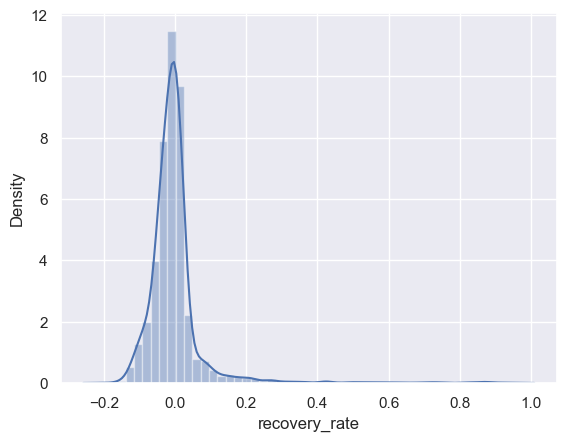

In [84]:
df_corr_st_2 = helper_functions.validate_linear_regression(reg_lgd_st_2,lgd_inputs_stage_2_test,lgd_targets_stage_2_test)

In [136]:
df_corr_st_2

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


Saving the Model

In [85]:
pickle.dump(reg_lgd_st_2, open(r'C:\Shubham\credit_scorecard\src\lgd_model_stage_2.sav', 'wb'))

# Combining Stage 1 and Stage 2

In [86]:
y_hat_test_lgd = helper_functions.combined_model(reg_lgd_st_2,reg_lgd_st_1,lgd_inputs_stage_1_test)

In [138]:
y_hat_test_lgd[:5]

array([0.1193906 , 0.09605635, 0.        , 0.1038923 , 0.        ])

# EAD Model

Splitting Dataset

In [87]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad',
                                                                                                                   'recovery_rate',
                                                                                                                   'recovery_rate_0_1',
                                                                                                                   'CCF'], axis = 1),
                                                                                        loan_data_defaults['CCF'],
                                                                                        test_size = 0.2,
                                                                                        random_state = 42)

Filtering features from Input Data

In [88]:
ead_inputs_train = helper_functions.filter_lgd_train_data(ead_inputs_train)

Estimation and Interpretation

In [90]:
reg_ead, summary_table_ead = linear_regression(ead_inputs_train, ead_targets_train)

In [159]:
pickle.dump(reg_ead, open(r'C:\Shubham\credit_scorecard\src\reg_ead.sav', 'wb'))

Filtering features from Test Data

In [91]:
ead_inputs_test = helper_functions.filter_lgd_train_data(ead_inputs_test)

Evaluating the Model

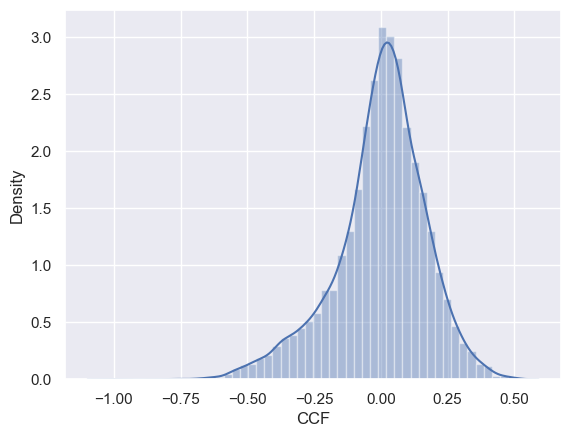

In [92]:
df_corr_ead, y_hat_test_ead = helper_functions.validate_ead_model(reg_ead,ead_inputs_test,ead_targets_test)

In [139]:
df_corr_ead

,CCF,0
CCF,1.000000,0.530654
0,0.530654,1.000000


# Expected Loss

In [14]:
with open(r'C:\Shubham\credit_scorecard\src\lgd_model_stage_1.sav',"rb") as file_obj:
    lgd_model_stage_1 = pickle.load(file_obj)

with open(r'C:\Shubham\credit_scorecard\src\lgd_model_stage_2.sav',"rb") as file_obj:
    lgd_model_stage_2 = pickle.load(file_obj)

with open(r'C:\Shubham\credit_scorecard\src\reg_ead.sav',"rb") as file_obj:
    reg_ead = pickle.load(file_obj)

In [10]:
loan_data_preprocessed = loan_data.copy()

In [11]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

Filtering features from Input Data

In [12]:
loan_data_preprocessed_lgd_ead = helper_functions.filter_lgd_train_data(loan_data_preprocessed)

Estimation

In [16]:
loan_data_preprocessed = helper_functions.expected_loss_estimation(lgd_model_stage_1,lgd_model_stage_2,reg_ead,loan_data_preprocessed,loan_data_preprocessed_lgd_ead)

In [118]:
# loan_data_inputs_train = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_train.csv')
# loan_data_inputs_test = pd.read_csv(r'C:\Shubham\credit_scorecard\output_data\loan_data_inputs_test.csv')

loan_data_inputs_train = df_inputs_prepr_1.copy()
loan_data_inputs_test = df_inputs_prepr_2.copy()

In [119]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)
# loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [124]:
ref_categories_pd = ['grade:G','annual_inc:<20K','int_rate:>20.281','mths_since_issue_d:>84']
loan_data_inputs_pd_temp = loan_data_inputs_pd[iv_features]
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)

In [126]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

array([0.02973721, 0.10577026, 0.04126029, ..., 0.02726491, 0.04145416,
       0.04126029])

In [127]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.
# THE END.